In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Define the file path
file_path =r'C:\Users\sriva\OneDrive\Desktop\coupons.csv' 

In [7]:
# Read the CSV file into a DataFrame
df=pd.read_csv(file_path)

In [8]:
# Print a summary of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [9]:
# Print a summary statistics of the DataFrame
print(df.describe())

        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000     

In [12]:
#print(df.head(20))

In [13]:
# Data Exploration
print("Summary Statistics:")
print(df.describe())  # Statistical summary of numerical columns
print("\nData Types:")
print(df.dtypes)  # Data types of each column
print("\nMissing Values:")
print(df.isnull().sum())  # Count missing values in each column

Summary Statistics:
        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000 

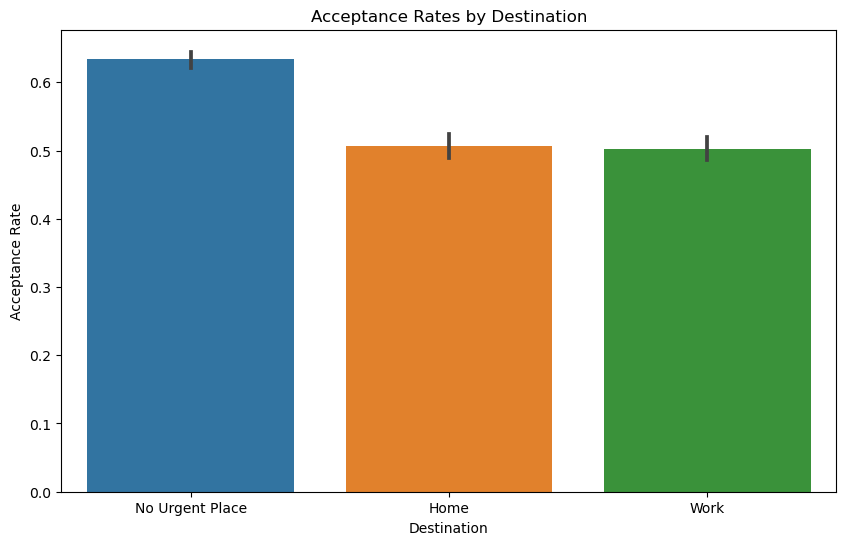

In [15]:
# Visualization
# Example 1: Bar plot of acceptance rates by destination
plt.figure(figsize=(10, 6))
sns.barplot(x='destination', y='Y', data=df)
plt.title('Acceptance Rates by Destination')
plt.xlabel('Destination')
plt.ylabel('Acceptance Rate')
plt.show()

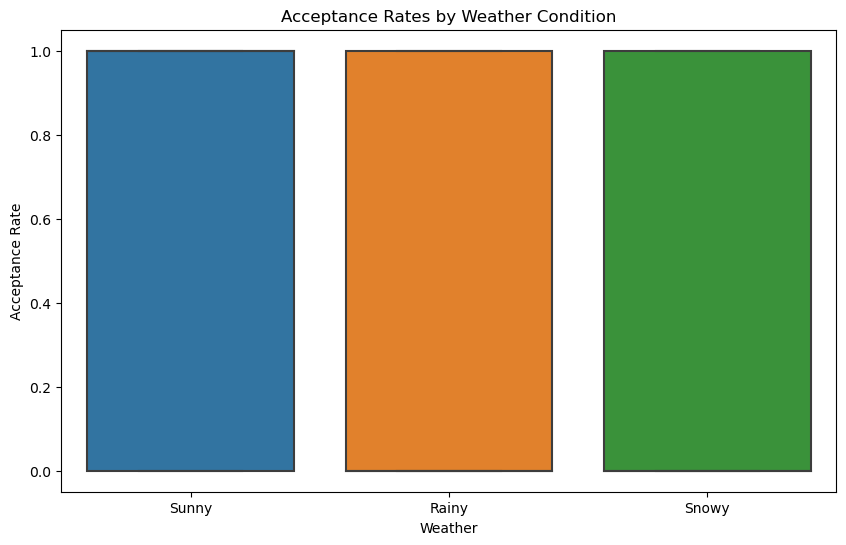

In [16]:
# Example 2: Box plot of acceptance rates by weather condition
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather', y='Y', data=df)
plt.title('Acceptance Rates by Weather Condition')
plt.xlabel('Weather')
plt.ylabel('Acceptance Rate')
plt.show()


C:\Users\sriva\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


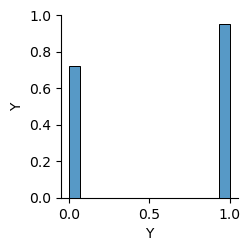

In [18]:
# Example 3: Pairplot for exploring relationships between numerical variables
sns.pairplot(df[['destination', 'time', 'weather', 'passanger', 'Y']])
plt.show()

In [19]:
# Calculate overall acceptance rate
total_responses = len(df)  # Total number of responses
accepted_responses = df['Y'].sum()  # Number of responses where Y=1 (accepted)
overall_acceptance_rate = accepted_responses / total_responses

print("Overall Acceptance Rate:", overall_acceptance_rate)

Overall Acceptance Rate: 0.5684326710816777


In [21]:
# Calculate acceptance rates by destination
acceptance_by_destination = df.groupby('destination')['Y'].mean().sort_values(ascending=False)

print("Acceptance Rates by Destination:")
print(acceptance_by_destination)

Acceptance Rates by Destination:
destination
No Urgent Place    0.633774
Home               0.506333
Work               0.502212
Name: Y, dtype: float64


In [22]:
# Calculate acceptance rates by time of day
acceptance_by_time = df.groupby('time')['Y'].mean()

# Calculate acceptance rates by weather condition
acceptance_by_weather = df.groupby('weather')['Y'].mean()

print("Acceptance Rates by Time of Day:")
print(acceptance_by_time)
print("\nAcceptance Rates by Weather Condition:")
print(acceptance_by_weather)

Acceptance Rates by Time of Day:
time
10AM    0.608352
10PM    0.508475
2PM     0.661523
6PM     0.584520
7AM     0.502212
Name: Y, dtype: float64

Acceptance Rates by Weather Condition:
weather
Rainy    0.462810
Snowy    0.470463
Sunny    0.594796
Name: Y, dtype: float64


In [24]:
# Calculate acceptance rates by passenger presence
acceptance_by_passenger = df.groupby('passanger')['Y'].mean()

print("Acceptance Rates by Passanger Presence:")
print(acceptance_by_passenger)

Acceptance Rates by Passanger Presence:
passanger
Alone        0.525804
Friend(s)    0.673438
Kid(s)       0.504970
Partner      0.595349
Name: Y, dtype: float64


In [26]:
# Filter the DataFrame to include only rows where Y=1 (coupon accepted)
accepted_customers = df[df['Y'] == 1]

# Analyze the relevant columns to identify characteristics or behaviors of accepted customers
# describe() to get statistical summaries of numerical columns
print("Summary Statistics of Accepted Customers:")
print(accepted_customers.describe())

# Also analyze specific columns to identify patterns or trends
# analyze the 'Destination' column to see which destinations are popular among accepted customers
print("\nTop Destinations for Accepted Customers:")
print(accepted_customers['destination'].value_counts())

Summary Statistics of Accepted Customers:
       temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  7210.000000   7210.000000            7210.0        7210.000000   
mean     64.323856      0.394591               1.0           0.526214   
std      18.959363      0.488797               0.0           0.499347   
min      30.000000      0.000000               1.0           0.000000   
25%      55.000000      0.000000               1.0           0.000000   
50%      80.000000      0.000000               1.0           1.000000   
75%      80.000000      1.000000               1.0           1.000000   
max      80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp       Y  
count        7210.000000     7210.000000    7210.000000  7210.0  
mean            0.089875        0.219972       0.780028     1.0  
std             0.286023        0.414256       0.414256     0.0  
min             0.000000        0.00